### Improving Sample for Test Data: only subjective sentences 

Here we are creating a new verion of the sample for the test data that tries to improve the iter-rater reliabiliy agreements on the sentiment of the answers/texts, by only keeping those sentences that, in each answer/text, are subjective.

We do it by using TextBlob and the user-defined functions remove_objective_sents().

### 1. Imports and Set Up

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

In [30]:
#### Set up working directory

cwd = os.chdir('/Users/alessia/Documents/DataScience/NLP_Project/Outputs')

In [31]:
pd.set_option('display.max_colwidth', -1)

### 2. Get Data

In [32]:
# Read in data 
testdata_sample = pd.read_csv("sa_q1_sample_testdata.csv")

https://stackoverflow.com/questions/23111990/pandas-dataframe-stored-list-as-string-how-to-convert-back-to-list

In [33]:
# check types

print(testdata_sample.dtypes)
[type(score) for sublist in testdata_sample['VDR_SA_scores_sents'][1] for score in sublist]

Unnamed: 0                                                                       int64  
Respondent ID                                                                    int64  
Q1_census_methods                                                                object 
Are you responding on behalf of an organisation, or as an individual?Response    object 
PublicSector                                                                     int64  
PrivateSector                                                                    int64  
OtherSectors                                                                     int64  
sent_tok_text                                                                    object 
VDR_SA_scores_sents                                                              object 
mean_VDR_SA_scores                                                               float64
VDR_polarity                                                                     object 
TB_SA_score_sents    

[str, str, str, str, str, str, str, str, str, str, str, str, str]

When reading the .csv that was generated by pandas.to_csv back in with pandas.read_csv, it automatically converts the column that contained a list of numbers (as the ones in the column VDR_SA_scores_sens) into a string.

This happens because list objects have a string representation, allowing them to be stored as .csv files. Loading the .csv will then yield that string representation.

Solutions:
https://stackoverflow.com/questions/23111990/pandas-dataframe-stored-list-as-string-how-to-convert-back-to-list


In [34]:
# Re-Read in data using literal_eval and converers
testdata_sample = pd.read_csv("sa_q1_sample_testdata.csv", converters=dict(VDR_SA_scores_sents=literal_eval, TB_SA_score_sents = literal_eval))

In [35]:
# OK
print(testdata_sample['VDR_SA_scores_sents'][1])
[type(score) for score in testdata_sample['VDR_SA_scores_sents'][1]]

[0.3612, 0.0]


[float, float]

### 3. Import basic NLP functions

In [36]:
cwd = os.chdir('/Users/alessia/Documents/DataScience/textconsultations/')

In [37]:
os.listdir()

['nlpfunctions', 'tutorial', 'README.md', '.git']

In [38]:
os.listdir('nlpfunctions');

In [39]:
import nlpfunctions.basic_NLP_functions as b_nlp

/Users/alessia/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### 4. Remove objective sentences from each answer/text

In [40]:
testdata_sample.columns

Index(['Unnamed: 0', 'Respondent ID', 'Q1_census_methods',
       'Are you responding on behalf of an organisation, or as an individual?Response',
       'PublicSector', 'PrivateSector', 'OtherSectors', 'sent_tok_text',
       'VDR_SA_scores_sents', 'mean_VDR_SA_scores', 'VDR_polarity',
       'TB_SA_score_sents', 'TB_mean_SA_score', 'TB_polarity'],
      dtype='object')

In [41]:
testdata_sample['sent_tok_text'] = testdata_sample['Q1_census_methods'].apply(lambda x: b_nlp.sent_tokenise_df(x))

In [42]:
testdata_sample['subjty_score_sents'] = testdata_sample['sent_tok_text'].apply(lambda x: b_nlp.get_subjectivity_df(x))

In [43]:
testdata_sample['Q1_only_subj_sents'] = testdata_sample['sent_tok_text'].apply(lambda x: b_nlp.remove_objective_sents_df(x))

In [46]:
testdata_sample[['subjty_score_sents', 'Q1_only_subj_sents']];

### 5. Recalculate Vader and TextBlob polarity scores for the subjective-only text

#### Vader

In [47]:
testdata_sample['only_subj_VDR_scores'] = testdata_sample['Q1_only_subj_sents'].apply(lambda x: b_nlp.get_sentiment_score_df(x))

In [48]:
testdata_sample['only_subj_mean_VDR_score'] = testdata_sample['only_subj_VDR_scores'].apply(lambda x: np.nanmean(x))

/Users/alessia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [49]:
testdata_sample['only_subj_VDR_polarity'] = testdata_sample['only_subj_mean_VDR_score'].apply(lambda x: 'pos' if x > 0 else 'neg' if x < 0 else "")

#### TextBlob

In [50]:
testdata_sample['only_subj_TB_scores'] = testdata_sample['Q1_only_subj_sents'].apply(lambda x: b_nlp.get_textblob_sentiment_score_df(x))

In [51]:
testdata_sample['only_subj_mean_TB_score'] = testdata_sample['only_subj_TB_scores'].apply(lambda x: np.nanmean(x))

/Users/alessia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [52]:
testdata_sample['only_subj_TB_polarity'] = testdata_sample['only_subj_mean_TB_score'].apply(lambda x: 'pos' if x > 0 else 'neg' if x < 0 else "")

#### Agreement

In [56]:
testdata_sample.iloc[:5, -6:]

,only_subj_VDR_scores,only_subj_mean_VDR_score,only_subj_VDR_polarity,only_subj_TB_scores,only_subj_mean_TB_score,only_subj_TB_polarity
0,"[0.0, 0.4754, -0.7269, 0.25, -0.624, -0.25, -0.34, 0.0]",-0.151938,neg,"[0.18333333333333335, 0.2222222222222222, -0.25, 0.375, -0.12, 0.0, 0.029166666666666674, 0.0]",0.054965,pos
1,NaN,NaN,,NaN,NaN,
2,NaN,NaN,,NaN,NaN,
3,"[0.4215, -0.3182]",0.051650,pos,"[0.4666666666666666, 0.06666666666666667]",0.266667,pos
4,"[0.4019, -0.4576, 0.0, -0.3182, 0.4019, 0.4754, 0.1376, 0.6908, 0.0]",0.147978,pos,"[0.125, 0.2, 0.11249999999999999, -0.022222222222222216, -0.0625, 0.375, 0.44375, 0.1361111111111111, 0.325]",0.181404,pos


In [57]:
pd.crosstab(testdata_sample['only_subj_VDR_polarity'], testdata_sample['only_subj_TB_polarity'])

only_subj_TB_polarity,,neg,pos
only_subj_VDR_polarity,,,
,68,2,9
neg,1,14,30
pos,0,6,70


TB tends to classify more texts as positive than TextBlob.

Now 68 texts were removed from the sample as containing only objective sentences.

Let's plot again the distribution of the TB polariy scores on which VADER and Textblob do not agree (VDR says 'neg', TB says 'pos').

As the distribution plot shows, these are not strongly polarised scores (i.e., very close to 0). Most of them lie in the [0, .30] range.

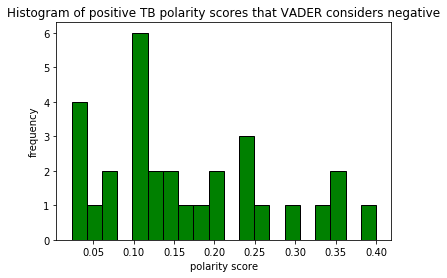

In [58]:
# matplotlib histogram
plt_data = testdata_sample[(testdata_sample.only_subj_VDR_polarity == 'neg') & (testdata_sample.only_subj_TB_polarity == 'pos')]

plt.hist(plt_data['only_subj_mean_TB_score'], color = 'green', edgecolor = 'black', bins=20)

# Add labels
plt.title('Histogram of positive TB polarity scores that VADER considers negative')
plt.xlabel('polarity score')
plt.ylabel('frequency')

plt.show()

In [59]:
# save data
testdata_sample.to_csv("/Users/alessia/Documents/DataScience/NLP_Project/Outputs/sa_q1_sample_testdata.csv")